In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import collections
import math
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import collections
import imblearn.under_sampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv1D
from keras import losses
from tensorflow.keras import optimizers
import tensorflow as tf

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('stroke_data_cleanedJB.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,children,Rural,161.28,19.1,never smoked,0


In [3]:
df.shape

(43389, 12)

# Preprocessing

In [4]:
df['smoking_status'] = df['smoking_status'].astype(str)

df['gender']=pd.get_dummies(df['gender'])
df['ever_married']=pd.get_dummies(df['ever_married'])
df['work_type']=pd.get_dummies(df['work_type'])
df['Residence_type']=pd.get_dummies(df['Residence_type'])


le = preprocessing.LabelEncoder()

df['smoking_status']=le.fit_transform(df['smoking_status'])


df = df.iloc[1:]

imp = KNNImputer(n_neighbors=2)
df = imp.fit_transform(df)



df = pd.DataFrame(df)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,30468.0,0.0,58.0,1.0,0.0,0.0,0.0,0.0,87.96,39.2,2.0,0.0
1,16523.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,110.89,17.6,2.0,0.0
2,56543.0,1.0,70.0,0.0,0.0,0.0,0.0,1.0,69.04,35.9,0.0,0.0
3,46136.0,0.0,14.0,0.0,0.0,1.0,0.0,1.0,161.28,19.1,2.0,0.0
4,32257.0,1.0,47.0,0.0,0.0,0.0,0.0,0.0,210.95,50.1,1.0,0.0


In [5]:
X = df.iloc[:, 1:11]
y = df.iloc[:,-1]
X.shape

(43388, 10)

In [6]:
X.head()

,1,2,3,4,5,6,7,8,9,10
0,0.0,58.0,1.0,0.0,0.0,0.0,0.0,87.96,39.2,2.0
1,1.0,8.0,0.0,0.0,1.0,0.0,0.0,110.89,17.6,2.0
2,1.0,70.0,0.0,0.0,0.0,0.0,1.0,69.04,35.9,0.0
3,0.0,14.0,0.0,0.0,1.0,0.0,1.0,161.28,19.1,2.0
4,1.0,47.0,0.0,0.0,0.0,0.0,0.0,210.95,50.1,1.0


In [7]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [9]:
y_train.shape

(1252,)

In [10]:
print('Ratio of class 1 over the number of class is',y_train.sum()/y_train.shape[0])

Ratio of class 1 over the number of class is 0.49440894568690097


# Logistic regression

In [11]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/mickaelelhaik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print(confusion_matrix(y_test, y_pred))

[[120  30]
 [ 35 129]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       150
         1.0       0.81      0.79      0.80       164

    accuracy                           0.79       314
   macro avg       0.79      0.79      0.79       314
weighted avg       0.79      0.79      0.79       314



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6285 2222]
 [  32  139]]
              precision    recall  f1-score   support

         0.0       0.99      0.74      0.85      8507
         1.0       0.06      0.81      0.11       171

    accuracy                           0.74      8678
   macro avg       0.53      0.78      0.48      8678
weighted avg       0.98      0.74      0.83      8678



In [15]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[8527    0]
 [ 153    0]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8527
         1.0       0.00      0.00      0.00       153

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



/Users/mickaelelhaik/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
X = df.iloc[:, 0:10]
y = df.iloc[:,-1]
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[8527    0]
 [ 153    0]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8527
         1.0       0.00      0.00      0.00       153

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.97      0.98      0.97      8680



/Users/mickaelelhaik/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Oversampling

In [57]:
rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
y_train.shape

(68185,)

In [37]:
print('Ratio of class 1 over the number of class is',y_train.sum()/y_train.shape[0])

Ratio of class 1 over the number of class is 0.500095328884652


In [59]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/mickaelelhaik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6313 2217]
 [1583 6934]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      8530
         1.0       0.76      0.81      0.78      8517

    accuracy                           0.78     17047
   macro avg       0.78      0.78      0.78     17047
weighted avg       0.78      0.78      0.78     17047



In [61]:
X = df.iloc[:, 1:11]
y = df.iloc[:,-1]
X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6273 2254]
 [  26  127]]
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85      8527
         1.0       0.05      0.83      0.10       153

    accuracy                           0.74      8680
   macro avg       0.52      0.78      0.47      8680
weighted avg       0.98      0.74      0.83      8680



In [48]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation="relu"))
model.add(Dense(6, input_dim=10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
history = model.fit(X_train,y_train,batch_size=30,epochs=50, verbose=1)

Epoch 1/50
2273/2273 [==============================] - 2s 644us/step - loss: 64.3654 - accuracy: 0.5404
Epoch 2/50
2273/2273 [==============================] - 1s 609us/step - loss: 3.0378 - accuracy: 0.6203
Epoch 3/50
2273/2273 [==============================] - 1s 613us/step - loss: 2.3022 - accuracy: 0.6518
Epoch 4/50
2273/2273 [==============================] - 1s 611us/step - loss: 2.6213 - accuracy: 0.6560
Epoch 5/50
2273/2273 [==============================] - 1s 617us/step - loss: 2.6697 - accuracy: 0.6571
Epoch 6/50
2273/2273 [==============================] - 1s 623us/step - loss: 2.0149 - accuracy: 0.6788
Epoch 7/50
2273/2273 [==============================] - 1s 622us/step - loss: 2.2456 - accuracy: 0.6699
Epoch 8/50
2273/2273 [==============================] - 1s 617us/step - loss: 2.2924 - accuracy: 0.6769
Epoch 9/50
2273/2273 [==============================] - 1s 616us/step - loss: 2.1101 - accuracy: 0.6767
Epoch 10/50
2273/2273 [==============================] - 1s 617

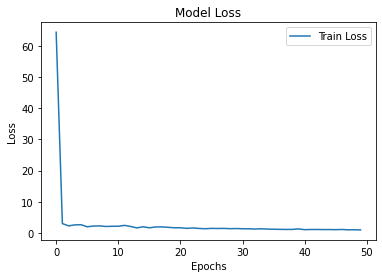

Final value of the loss :  1.0068696737289429
Final value of accuracy : 0.7087776064872742


In [51]:
loss = history.history['loss']
accuracy = history.history['accuracy']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

print("Final value of the loss : ", loss[-1])
print("Final value of accuracy :", accuracy[-1])

In [111]:
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6018 2512]
 [1066 7451]]
              precision    recall  f1-score   support

         0.0       0.85      0.71      0.77      8530
         1.0       0.75      0.87      0.81      8517

    accuracy                           0.79     17047
   macro avg       0.80      0.79      0.79     17047
weighted avg       0.80      0.79      0.79     17047

